# EDA of the best dataset in the world!!!

## Load dataset

In [1]:
# Load Iris dataset
from sklearn import datasets

iris = datasets.load_iris()

## Get basic info about the data

In [2]:
# Target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# Feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Get data to pandas dataframe
import pandas as pd
import numpy as np

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

# Save to csv just in case
iris_df.to_csv('../iris_data/iris.csv', index=False)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Get info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [6]:
# Get summary statistics
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Get the count of "species" column
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Data Visualzation

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Target plots

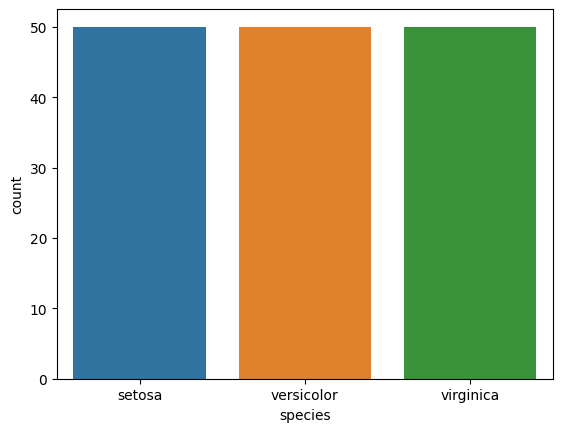

In [9]:
# Histogram of count of each species
sns.countplot(data=iris_df, x='species', hue='species')
plt.show()

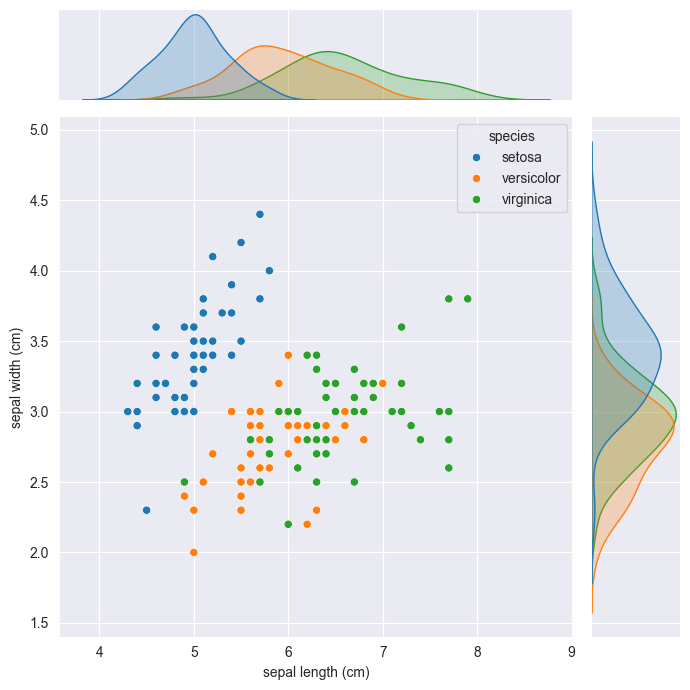

In [10]:
# Plot of sepal length vs sepal width
sns.set_style("darkgrid")
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, height=7, hue='species')
plt.show()

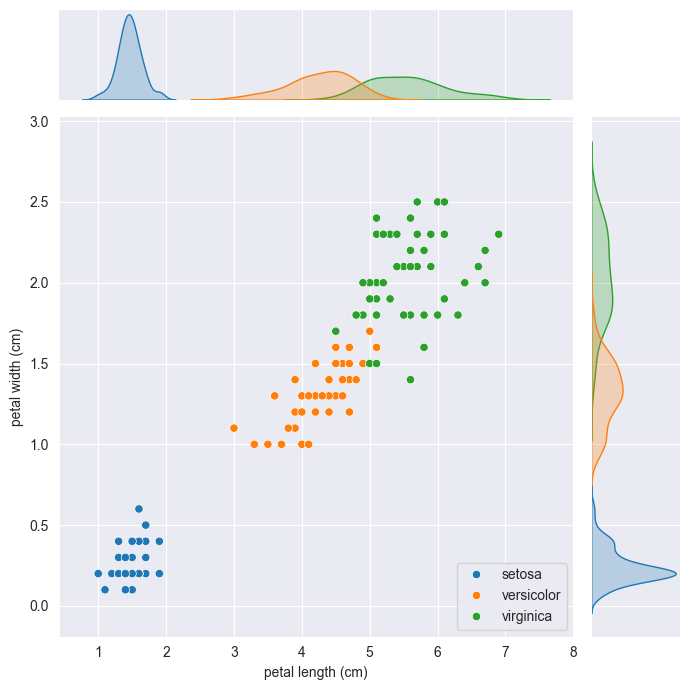

In [11]:
# Plot of petal length vs petal width
sns.jointplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, height=7, hue='species')
plt.legend(loc='lower right')
plt.show()

In [12]:
# Plot 3D using plotly using all features
import plotly.express as px

fig = px.scatter_3d(iris_df, x='petal length (cm)', y='petal width (cm)', z='sepal length (cm)', size='sepal width (cm)', 
                    color='species', color_discrete_map={'setosa':'blue', 'versicolor':'orange', 'virginica':'green'}, width=1200, height=800)
fig.show()

### Features plots

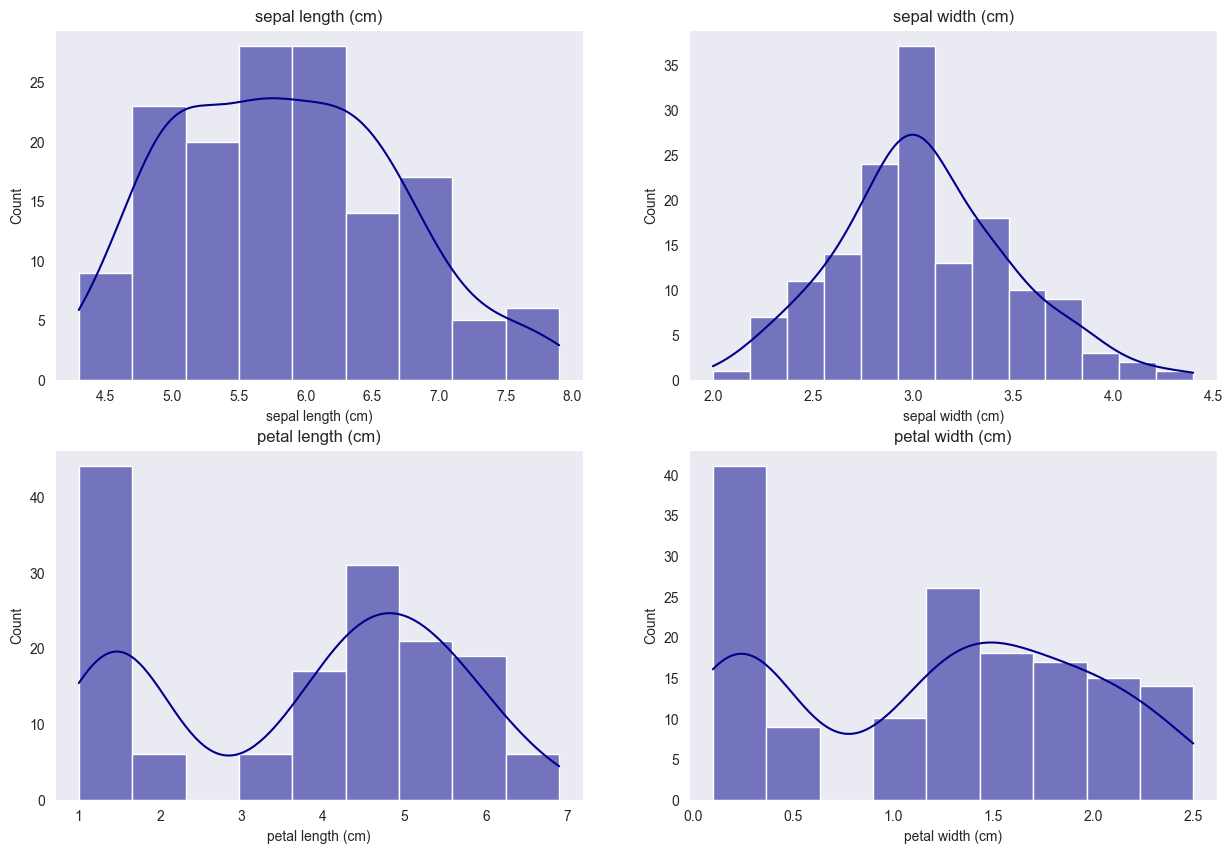

In [13]:
# Histogram of all features
sns.set_style("dark")
subplot_titles = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    sns.histplot(iris_df[iris_df.columns[i]], kde=True, ax=ax, color='darkblue')
    ax.set_title(subplot_titles[i])

plt.show()

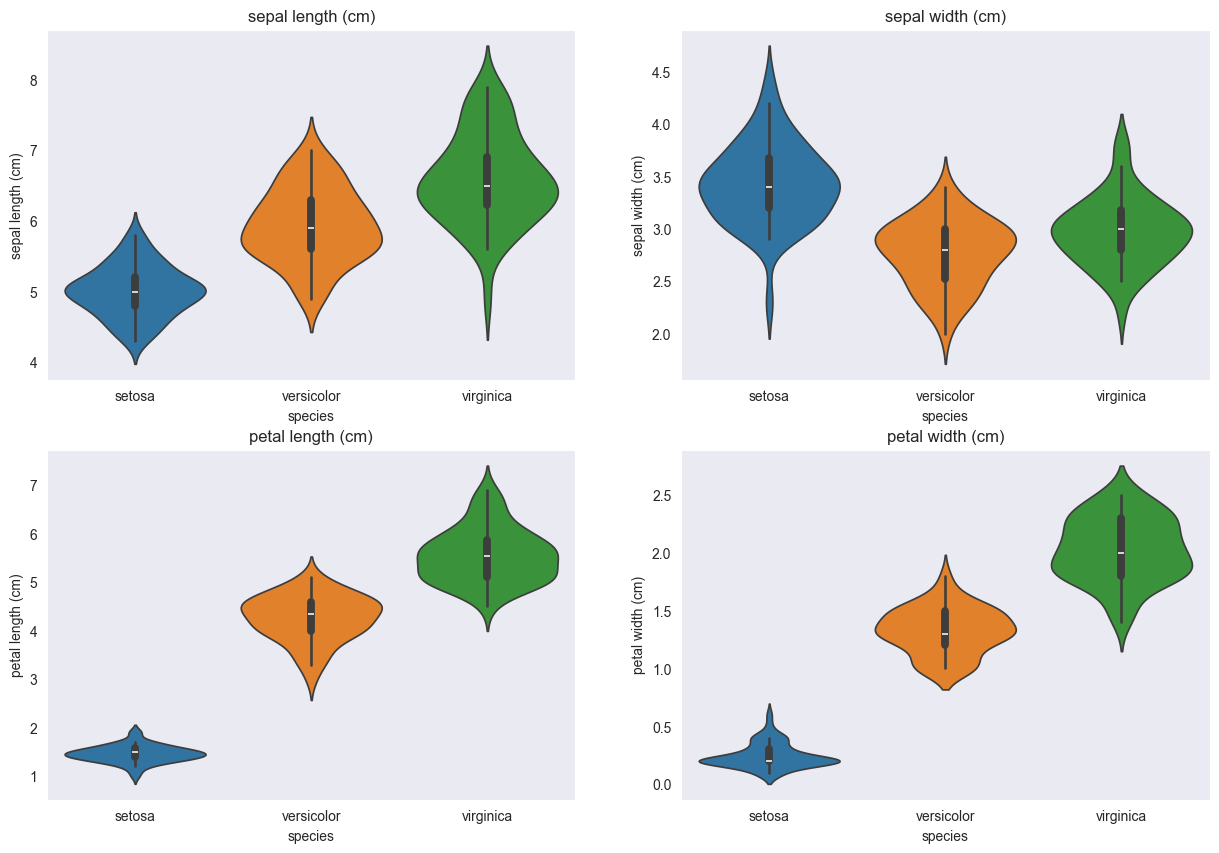

In [14]:
# Violin plot of all features
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    sns.violinplot(x='species', y=iris_df.columns[i], data=iris_df, ax=ax, hue='species')
    ax.set_title(subplot_titles[i])

plt.show()

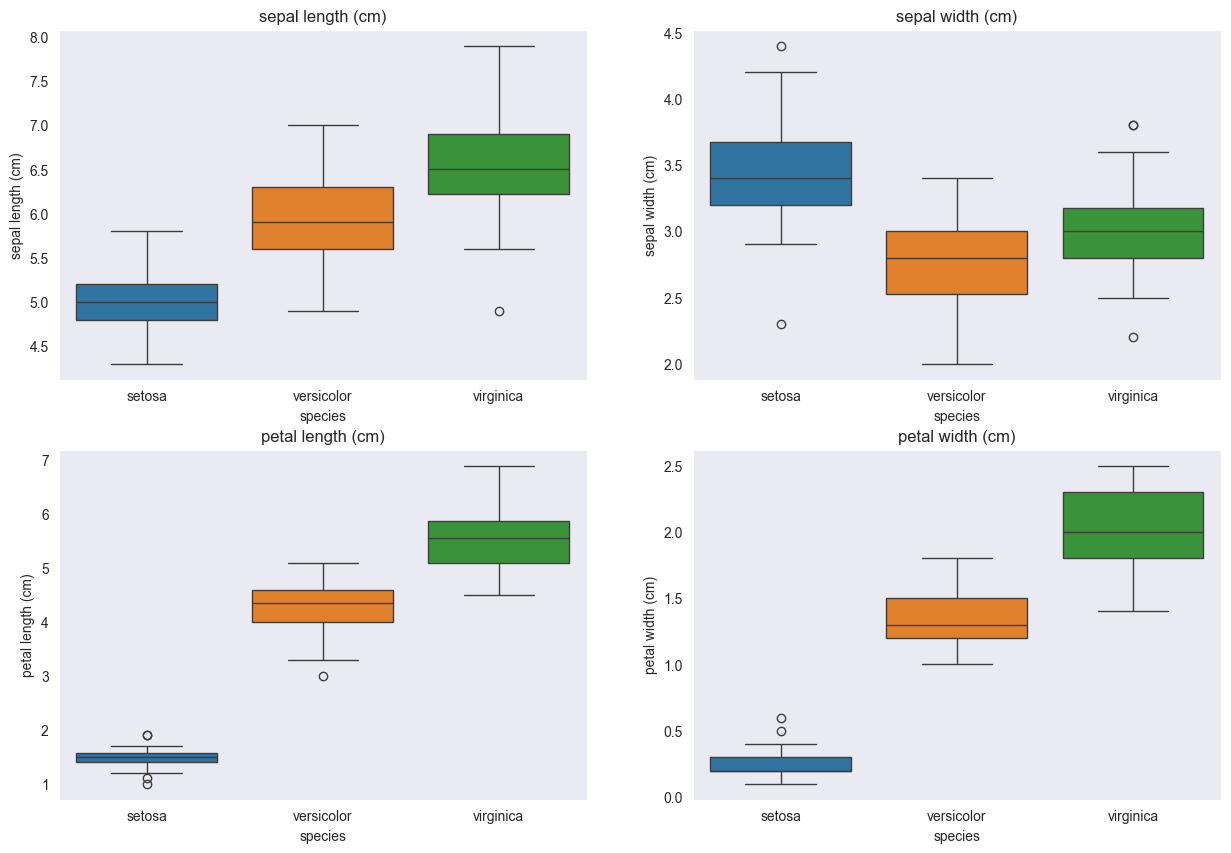

In [15]:
# Boxplot of all features
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    sns.boxplot(x='species', y=iris_df.columns[i], data=iris_df, ax=ax, hue='species')
    ax.set_title(subplot_titles[i])
    
plt.show()

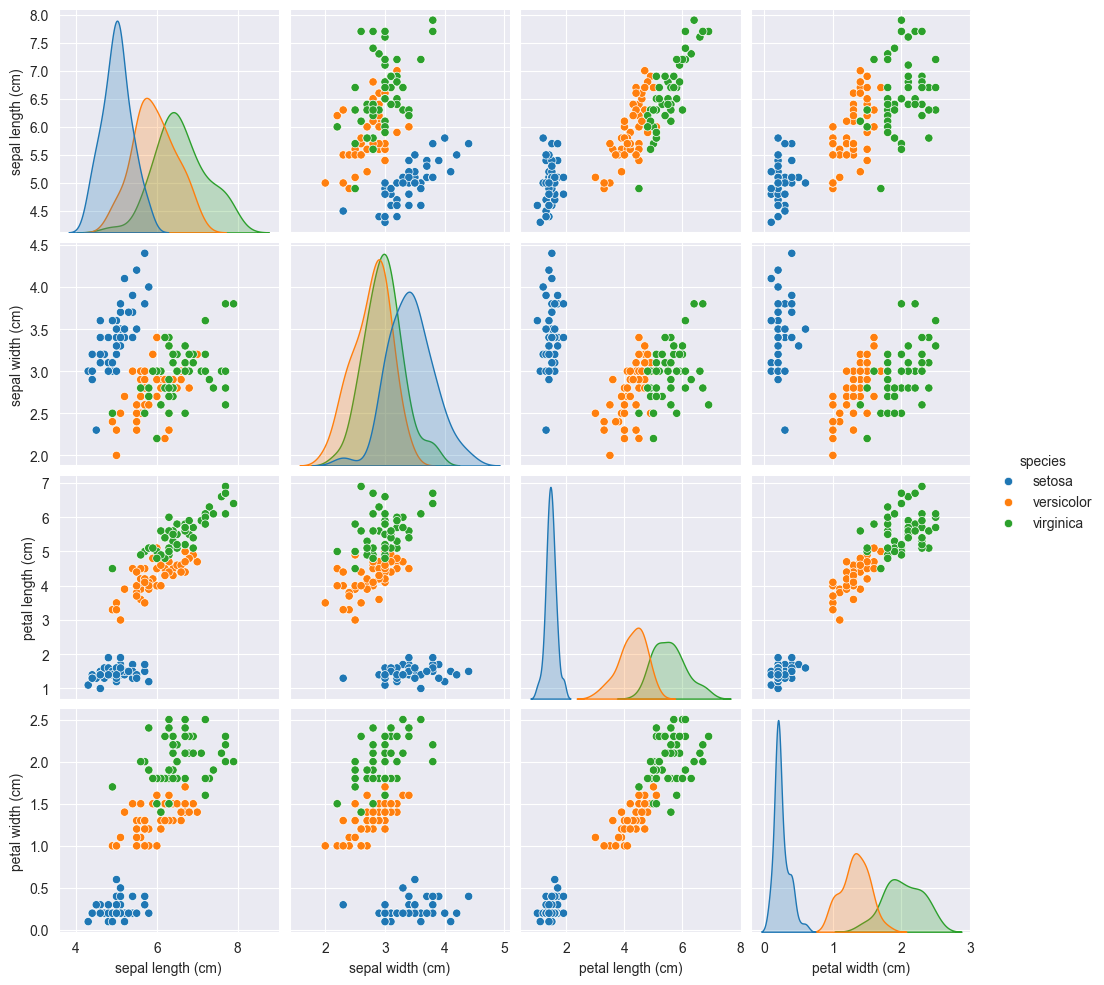

In [16]:
# Pairplot of all features
sns.set_style("darkgrid")
sns.pairplot(iris_df, hue='species')
plt.show()

### Correlations

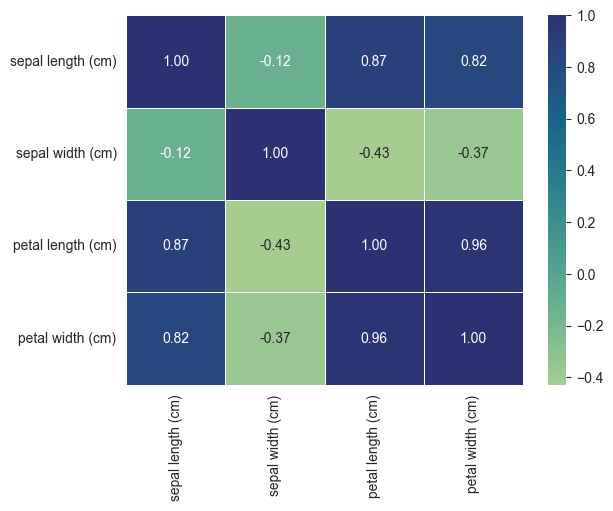

In [17]:
# Exclude non-numeric columns
numeric_cols = iris_df.select_dtypes(include=[np.number])

# Correlation matric
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest',linewidth=.5, fmt='.2f')
plt.show()